# prepare exercises

## part I

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

import acquire

In [2]:
df = acquire.join_tables()

Returning saved csv file : items.csv
Got table: items
Returning saved csv file : stores.csv
Got table: stores
Returning saved csv file : sales.csv
Got table: sales


In [3]:
df.sample(2)

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
53442,30,38.0,"Sun, 04 May 2014 00:00:00 GMT",530029,1,Petmate,30,Petmate Booda Bones Steak Bacon & Chicken Flav...,8.39,723503568678,723503568678,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
121378,17,42.0,"Wed, 13 May 2015 00:00:00 GMT",294849,2,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,9255 FM 471 West,San Antonio,2,TX,78251


1. Convert date column to datetime format. 

In [4]:
df.sale_date.dtype #is object type

dtype('O')

In [5]:
df.sale_date[:3] # but they look like they have a consistent formatting

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [6]:
%%timeit
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

4.91 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
df.sample(3)

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
342491,38,77.0,2015-10-27 00:00:00+00:00,682128,4,Sundown Naturals,38,Sundown Naturals Essential Electrolytes Tropic...,3.45,30768540548,30768540548,516 S Flores St,San Antonio,4,TX,78204
711319,40,40.0,2015-10-03 00:00:00+00:00,725928,8,Amys,40,Amys Light & Lean Spaghetti Italiano,0.60,42272008063,42272008063,15000 San Pedro Ave,San Antonio,8,TX,78232
750924,12,77.0,2014-03-15 00:00:00+00:00,215907,9,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221


2. Plot the distribution of sale_amount and item_price. 

<AxesSubplot:>

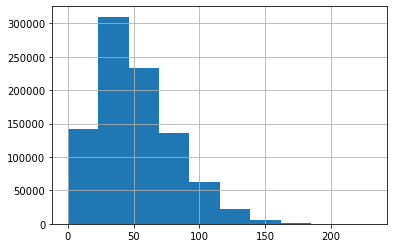

In [8]:
df.sale_amount.hist()

<AxesSubplot:>

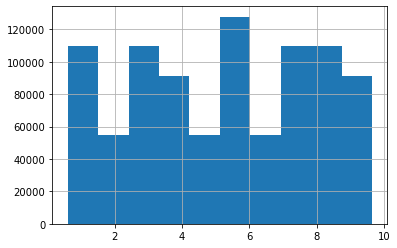

In [9]:
df.item_price.hist()

3. Set the index to be the datetime variable.

In [10]:
df.set_index('sale_date').sample(3)

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2016-05-21 00:00:00+00:00,16,38.0,280615,4,Burts Bees,16,Burts Bees Daily Moisturizing Cream Sensitive,5.17,792850014008,792850014008,516 S Flores St,San Antonio,4,TX,78204
2017-08-04 00:00:00+00:00,15,110.0,257317,1,Suave,15,Suave Naturals Moisturizing Body Wash Creamy T...,9.11,79400847201,79400847201,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2015-11-17 00:00:00+00:00,35,44.0,632847,7,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12018 Perrin Beitel Rd,San Antonio,7,TX,78217


4. Add a 'month' and 'day of week' column to your dataframe.

In [11]:
df['month'] = df.sale_date.dt.month
df['day of the week'] = df.sale_date.dt.weekday

5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price. 

In [13]:
df['sales_total'] = df['sale_amount']*df['item_price']

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [62]:
def prepare_sales_data(df):
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    df['month'] = df.sale_date.dt.month
    df['day of the week'] = df.sale_date.dt.weekday
    df['sales_total'] = df['sale_amount']*df['item_price']
    return df

prepare_sales_data(acquire.join_tables())

Returning saved csv file : items.csv
Got table: items
Returning saved csv file : stores.csv
Got table: stores
Returning saved csv file : sales.csv
Got table: sales


,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day of the week,sales_total
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,10.92
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2,9.24
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,3,11.76
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,4,10.92
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,5,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63.0,2017-12-27 00:00:00+00:00,912996,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231,12,2,327.60
912996,50,59.0,2017-12-28 00:00:00+00:00,912997,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231,12,3,306.80
912997,50,74.0,2017-12-29 00:00:00+00:00,912998,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231,12,4,384.80
912998,50,62.0,2017-12-30 00:00:00+00:00,912999,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231,12,5,322.40


## part II


In [43]:
df_energy = acquire.get_german_energy_data()

In [44]:
df_energy.sample(3)

,Date,Consumption,Wind,Solar,Wind+Solar
1417,2009-11-18,1495.972,NaN,NaN,NaN
1049,2008-11-15,1286.460,NaN,NaN,NaN
2384,2012-07-12,1270.422,158.374,115.136,273.51


1. Convert date column to datetime format. 

In [45]:
df_energy.Date = pd.to_datetime(df_energy.Date)

In [46]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


2. Plot the distribution of each of your variables. 

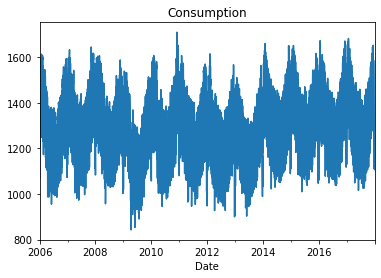

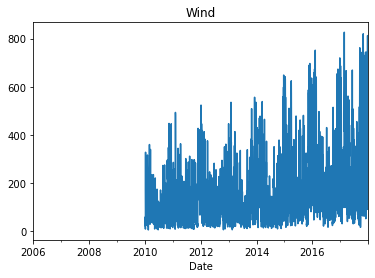

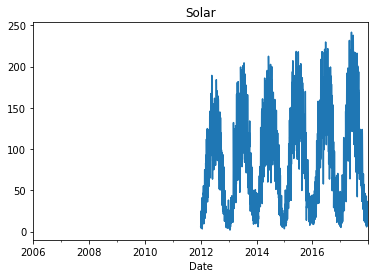

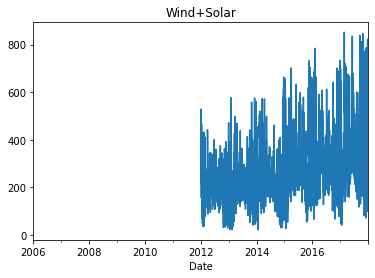

In [50]:
for column in ['Consumption', 'Wind', 'Solar', 'Wind+Solar']:
    df_energy.set_index('Date')[column].plot()
    plt.title(column)
    plt.show()

3. Set the index to be the datetime variable. 

In [51]:
df_energy.set_index('Date')

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


4. Add a month and a year column to your dataframe.

In [53]:
df_energy['month'] = df_energy['Date'].dt.month
df_energy['year'] = df_energy['Date'].dt.year

5. Fill any missing values.

In [58]:
#assuming that the NaN is because there was no energy produced on that date
# this probably makes sense because consumption is present for every row
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
 5   month        4383 non-null   int64         
 6   year         4383 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 239.8 KB


In [59]:
df_energy = df_energy.fillna(0)

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [61]:
def prepare_energy_german(df):
    df.Date = pd.to_datetime(df.Date)
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df = df.fillna(0)
    return df

prepare_energy_german(acquire.get_german_energy_data())

,Date,Consumption,Wind,Solar,Wind+Solar,month,year
0,2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
1,2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2,2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
3,2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
4,2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
4379,2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
4380,2017-12-29,1295.08753,584.277,29.854,614.131,12,2017
4381,2017-12-30,1215.44897,721.247,7.467,728.714,12,2017
